CPU Usage: 18.4 %
Execution time for each thread: [12.212736368179321, 12.08718752861023, 11.907366275787354, 11.798898220062256, 11.666632175445557, 11.550414085388184, 11.42722749710083, 11.311163425445557, 11.170825719833374, 11.061084508895874, 10.942958116531372, 10.838417530059814, 10.732712268829346, 10.59070897102356, 10.476499557495117, 10.36561107635498, 10.220022201538086, 10.057169914245605, 9.911678791046143, 9.794017314910889, 9.693564176559448, 9.565319299697876, 9.44663667678833, 9.317664623260498, 9.188507795333862, 9.070446252822876, 8.975032091140747, 8.849609375, 8.704017877578735, 8.595853805541992, 8.490813732147217, 8.373514413833618, 8.269399404525757, 8.116634368896484, 8.013375520706177, 7.892857789993286, 7.741354703903198, 7.616650104522705, 7.485818862915039, 7.353640556335449, 7.244282245635986, 7.110687017440796, 6.98124361038208, 6.879743576049805, 6.723604202270508, 6.551159620285034, 6.3789222240448, 6.259105443954468, 6.1600422859191895, 6.06235361099

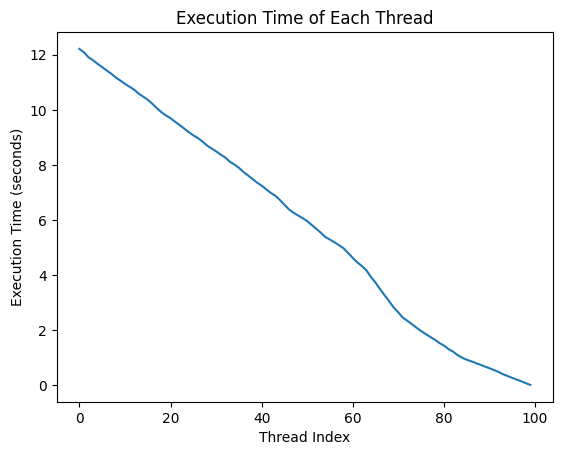

In [ ]:
import numpy as np
import concurrent.futures
import psutil
import matplotlib.pyplot as plt
import time

# Generate random matrices
random_matrices = [np.random.rand(1000, 1000) for _ in range(100)]

# Constant matrix
constant_matrix = np.random.rand(1000, 1000)

# Function to multiply matrix by constant matrix
def multiply_matrix(matrix):
    return np.dot(matrix, constant_matrix)

# Number of available CPU cores
num_cores = psutil.cpu_count(logical=False)

# Record start times for each thread
start_times = [None] * 100

# Split the work among cores
results = [None] * 100
with concurrent.futures.ThreadPoolExecutor(max_workers=num_cores) as executor:
    future_to_index = {executor.submit(multiply_matrix, matrix): i for i, matrix in enumerate(random_matrices)}
    for future in concurrent.futures.as_completed(future_to_index):
        index = future_to_index[future]
        start_times[index] = time.time()  # Record start time for this thread
        results[index] = future.result()

# Calculate CPU usage
cpu_usage = psutil.cpu_percent()

# Record end times for each thread
end_times = [time.time() for _ in range(100)]

# Calculate execution time for each thread
execution_times = [end_times[i] - start_times[i] for i in range(100)]

# Print CPU usage
print("CPU Usage:", cpu_usage, "%")

# Print execution time for each thread
print("Execution time for each thread:", execution_times, "seconds")

# Generate result table and graph
plt.plot(execution_times)
plt.xlabel('Thread Index')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Each Thread')
plt.show()

